In [2]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os

# Singular Value Decomposition (SVD)
## 1. Introduction
This project aims to explore the theoretical underpinnings of SVD, its computational aspects, and practical applications in real-world scenarios. By delving into the intricacies of SVD, we seek to not only understand its mathematical foundations but also demonstrate its utility through hands-on implementations and case studies. Through this exploration, we aim to provide a comprehensive overview that highlights both the theoretical elegance and practical significance of Singular Value Decomposition in contemporary data-driven applications.


## 2. Mathematical overview of SVD
Singular Value Decomposition (SVD) is a matrix factorization technique that decomposes a matrix $X$ into three simpler matrices.
For given $n \times m$ matrix $X$ : $X = U\Sigma V^T$
1. Let $X \in \mathbb{R}^{n \times m}$ is matrix of rank $p$ , where $p \le \min(m,n)$
2. $U \in \mathbb{R}^{n \times n}$ is orthogonal matrix $(UU^T = U^TU = \mathbb{I})$. $U$ contains the normalized left singular vectors of matrix $X$.
 $$
U = \begin{pmatrix}
|&| &  & |\\
u_1&u_2 & \cdots & u_n\\ 
|&| &  & |
\end{pmatrix}_{n \times n}
$$
4. $\Sigma \in \mathbb{R}^{n \times m}$ is diagonal matrix $n \times m$, with descending non-negative values on its diagonal and zeros elsewhere. The entries $\sigma_1 \geq \cdots \geq \sigma_m \geq 0$ on the diagonal of $\Sigma$ are the singular values (SVs) of $X$.
$$ 
\Sigma ={ \begin{pmatrix}
\sigma_1 & &\\
& \ddots &\\ 
& & \sigma_m\\
\hline \\
& \huge0 &
\end{pmatrix}}_{n \times m}
$$
6. $V \in \mathbb{R}^{m \times m}$ is orthogonal matrix $m \times m \ (VV^T = V^TV = \mathbb{I})$. $V$ contains the normalized right singular vectors of matrix $X$.
$$
V^T = { \begin{pmatrix}
&- v_1^t - \\
&- v_2^t - \\
 & \cdots & \\ 
&- v_n^t - 
\end{pmatrix}}_{m \times m}
$$
8. $X = U\Sigma V^t = \sigma_1u_1v_1^t + \sigma_2u_2v_2^t + \cdots + \sigma_mu_mv_m^t = \sum_{i=1}^{m}\sigma_iu_iv_i^t$

## 3. Example
We will make an example with the matrix 
$X = \begin{pmatrix}
3 & 2 & 2\\
2 & 3 & -2
\end{pmatrix}$ .

$S_L = XX^T = \begin{pmatrix}
17 & 8\\
8 & 17
\end{pmatrix}$  and $S_R = X^TX = \begin{pmatrix}
13 & 12 & 2\\
12 & 13 & -2\\
2 & -2 & 8
\end{pmatrix}$ .

The eigen values of $S_L$ are $\lambda_1 = 25$ and $\lambda_2 = 9$.

The eigen values of $S_R$ are $\lambda_1 = 25$ and $\lambda_2 = 9$ and $\lambda_3 = 0$ .

We know that $\sqrt{\lambda_1} = \sigma_1 = 5$ and $\sqrt{\lambda_2} = \sigma_2 = 3$ are the singular values of $X$.

We can calculate the normalized eigenvectors for $S_L$: $u_1 = \begin{pmatrix}
\frac{1}{\sqrt{2}}\\
\frac{1}{\sqrt{2}}
\end{pmatrix}$ and $u_2 = \begin{pmatrix}
-\frac{1}{\sqrt{2}}\\
\frac{1}{\sqrt{2}}
\end{pmatrix}$ .

We can calculate the normalized eigenvectors for $S_R$: $v_1 = \begin{pmatrix}
\frac{1}{\sqrt{2}}\\
\frac{1}{\sqrt{2}}\\
0
\end{pmatrix}$ and $v_2 = \begin{pmatrix}
-\frac{1}{\sqrt{18}}\\
\frac{1}{\sqrt{18}}\\
-\frac{4}{\sqrt{18}}
\end{pmatrix}$ and $v_3 = \begin{pmatrix}
-\frac{2}{\sqrt{3}}\\
\frac{2}{\sqrt{3}}\\
\frac{1}{\sqrt{3}}
\end{pmatrix}$

Now we have $X = U\Sigma V^T = S_L\Sigma S_R = \begin{pmatrix}
\frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}\\
\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}}
\end{pmatrix}$ $\begin{pmatrix}
5 & 0 & 0\\
0 & 3 & 0
\end{pmatrix}$ $\begin{pmatrix}
\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} & 0\\
-\frac{1}{\sqrt{18}} & \frac{1}{\sqrt{18}} & -\frac{4}{\sqrt{18}} \\
-\frac{2}{3} & \frac{2}{3} & \frac{1}{3} 
\end{pmatrix}$ .

In [3]:

# Define the matrix X with the given values
X = np.array([[3, 2, 2],
              [2, 3, -2]])

# Compute the SVD of the matrix X
U, S, Vt = np.linalg.svd(X, full_matrices=True)

# Convert the singular values to a diagonal matrix
S_matrix = np.diag(S)

# Extend the singular values matrix S to match the dimensions of U and Vt
S_extended = np.zeros((U.shape[0], Vt.shape[0]))
S_extended[:len(S), :len(S)] = S_matrix

# Reconstruct the original matrix X
X_reconstructed = np.dot(U, np.dot(S_extended, Vt))

# Set print options for better readability
np.set_printoptions(precision=8, suppress=True)

# Print the results
print("Matrix U:")
print(U)
print("\nSingular values (as a diagonal matrix S):")
print(S_matrix)
print("\nMatrix V (transpose):")
print(Vt)
print("\nReconstructed matrix X:")
print(X_reconstructed)

Matrix U:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

Singular values (as a diagonal matrix S):
[[5. 0.]
 [0. 3.]]

Matrix V (transpose):
[[ 0.70710678  0.70710678  0.        ]
 [-0.23570226  0.23570226 -0.94280904]
 [-0.66666667  0.66666667  0.33333333]]

Reconstructed matrix X:
[[ 3.  2.  2.]
 [ 2.  3. -2.]]


## 4. SVD for image compression
An image can be broken down into three color channels: red, green, and blue, each represented by an $m \times n$ matrix with values ranging from 0 to 255. For simplicity, let us focus on compressing grayscale image, denoted as $A$.
To compress $A$, we will use SVD. $A = U_r\Sigma_r V_r^T$ 
The matrices are sorted by their importance in contributing to $A$, allowing us to approximate $A$ effectively by retaining only the most significant parts.

Choose a number $r$ of singular values to use for the approximation.
Select the first $r$ columns of matrix $U$ and $V$, and the upper left $r \times r$ square of matrix $\Sigma$. These components contain the $r$ largest and most significant singular values. Increasing $r$ improves the quality of the approximation but requires more data to store. Thus, selecting an optimal $r$ balances between quality and storage efficiency.

In the context of grayscale conversion, this technique helps compress the image matrix $A$ while retaining its essential visual information based on the chosen number of singular values $r$ it.

Here we can think for SVD like this: $X = U_r\Sigma_r V_r^T$, where r is the number of singular values that we are going to use for the approximation.

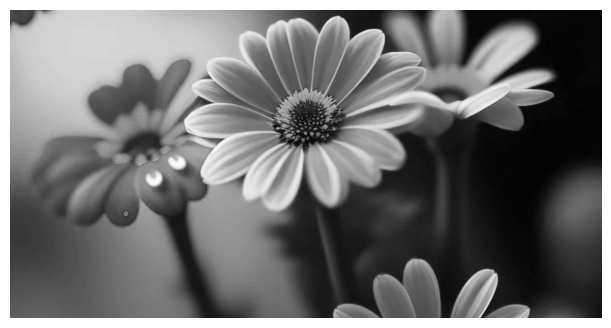

In [4]:
plt.rcParams['figure.figsize'] = [8, 4]

A = imread('Flowers.jpg')
X = np.mean(A, -1); # Convert RGB to grayscale
img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

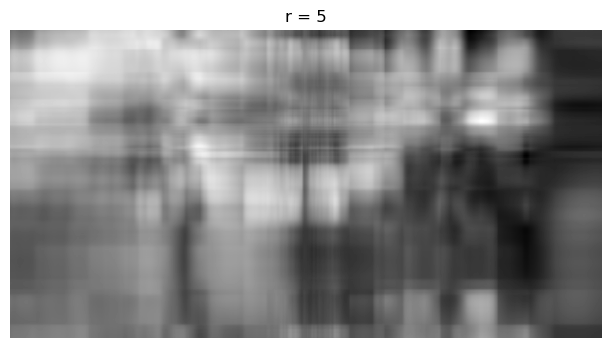

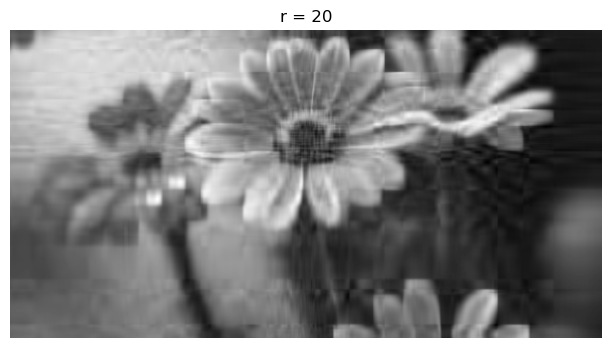

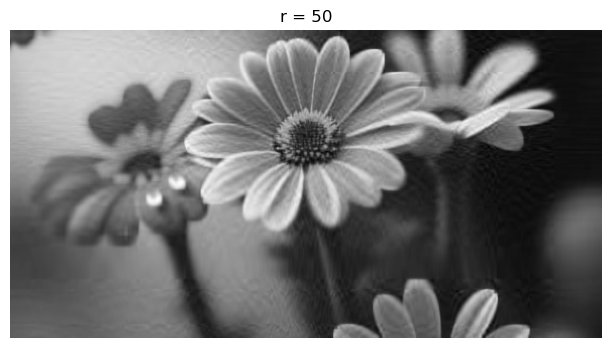

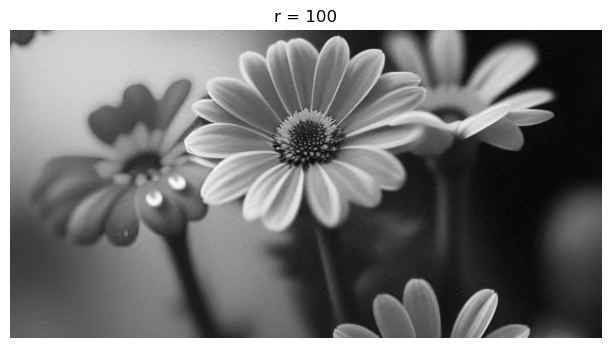

In [5]:
U, S, VT = np.linalg.svd(X,full_matrices=False)
S = np.diag(S)

j = 0
for r in (5, 20, 50, 100):
    # Construct approximate image
    Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    plt.figure(j+1)
    j += 1
    img = plt.imshow(Xapprox)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('r = ' + str(r))
    plt.show()

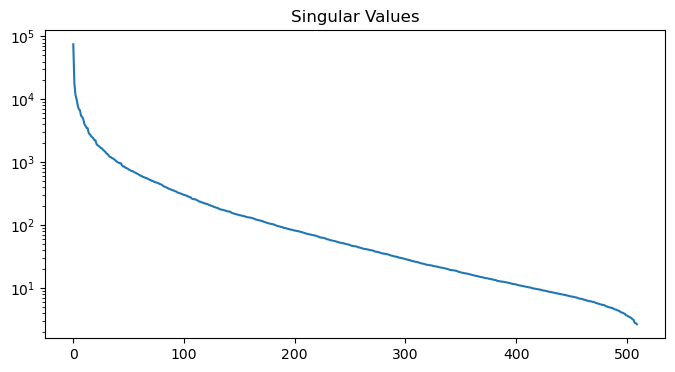

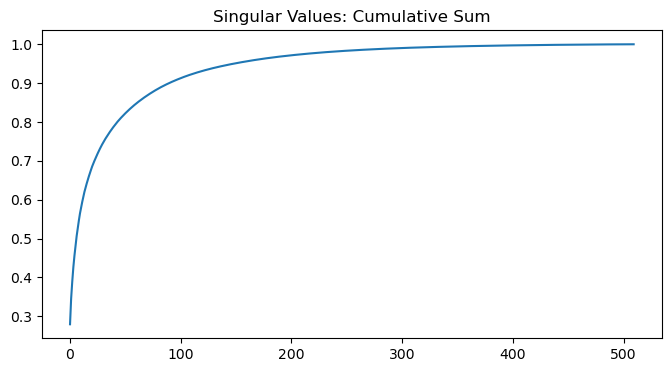

In [7]:
plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative Sum')
plt.show()

## 5. Conclusion 
Looking ahead, the relevance of SVD is poised to grow further as data continues to expand in volume and complexity. Its role in machine learning, pattern recognition, and information retrieval underscores its importance as a foundational technique in data science and beyond.

## 6. References 
1. https://www.youtube.com/watch?v=vSczTbgc8Rc&ab_channel=VisualKernel
2. https://www.youtube.com/watch?v=nbBvuuNVfco&list=PLMrJAkhIeNNSVjnsviglFoY2nXildDCcv&index=2&ab_channel=SteveBrunton
3. https://timbaumann.info/svd-image-compression-demo/
4. https://www.geeksforgeeks.org/image-reconstruction-using-singular-value-decomposition-svd-in-python/
5. https://python.quantecon.org/svd_intro.html
6. https://medium.com/mcd-unison/singular-value-decomposition-applied-to-images-streamlit-app-656e2467a25e
7. https://medium.com/intuition/the-mathematical-and-geographic-understanding-of-singular-value-decomposition-svd-8da2297797c6
8. https://en.wikipedia.org/wiki/Singular_value_decomposition